In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [ ]:
!pip install emoji

In [ ]:
import emoji

## Data Preparation


In [ ]:
data = pd.read_csv("WhatsApp Chat with Bois in da hood🌚😎.txt", sep = '/20, ', names = ['Date', 'Message']) # error_bad_lines=False
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Date,Message
0,5/19,1:19 PM - Messages to this group are now secur...
1,5/19,"1:19 PM - Siddharth Chitkara created group ""Bros"""
2,5/19,1:19 PM - Siddharth Chitkara added you
3,5/19,1:19 PM - Siddharth Chitkara: whatsup bros
4,5/19,1:19 PM - Aniket Uca C1: Hey Bros🤟🏻
...,...,...
5105,8/19,4:55 PM - Dhritanshu Aggarwal Chitkara: <Media...
5106,8/19,4:55 PM - Dhritanshu Aggarwal Chitkara: <Media...
5107,8/19,4:55 PM - Dhritanshu Aggarwal Chitkara: <Media...
5108,8/19,4:58 PM - Aniket Uca C1: 🔥🔥


In [ ]:
# As we see above read_csv is not suitable for this file, therefore I am going to instead transform it into a list of strings
def read_file(file):
    f = open(file,'r', encoding = 'utf-8') # Read-only
    f_str = f.read() # Convert to string
    f_str_list = f_str.splitlines() # Converts the chunk of string into a list of strings
    return f_str_list

data = read_file('WhatsApp Chat with Bois in da hood🌚😎.txt')

In [ ]:
type(data)

list

In [ ]:
len(data)

5157

In [ ]:
data[:10]

['5/19/20, 1:19 PM - Messages to this group are now secured with end-to-end encryption. Tap for more info.',
 '5/19/20, 1:19 PM - Siddharth Chitkara created group "Bros"',
 '5/19/20, 1:19 PM - Siddharth Chitkara added you',
 '5/19/20, 1:19 PM - Siddharth Chitkara: whatsup bros',
 '5/19/20, 1:19 PM - Aniket Uca C1: Hey Bros\U0001f91f🏻',
 '5/19/20, 1:19 PM - Aniket Uca C1: Aaj aag lagani hai 🔥😎',
 '5/19/20, 1:20 PM - Dhritanshu Aggarwal Chitkara: Hola',
 '5/19/20, 1:20 PM - Devang Kapoor: Yo bros!',
 '5/19/20, 1:20 PM - Siddharth Chitkara: kuch aata hoga toh lagegi aag 😂',
 "5/19/20, 1:20 PM - Devang Kapoor: That's the spirit"]

In [ ]:
# Removing the elements that are not of date format
def check_date(data):  
  for i in range(len(data)):
    try:
      datetime.datetime.strptime(data[i].split(',')[0], '%m/%d/%y') # Converts string date into a date object
    except ValueError: # Returns an error if the string is not a datetime object
      data[i-1] += ' ' + data[i] # Appends the next line to the previous line
      data[i] = "NA" # Replace the unwanted text element with 'NA'
      
  #Handle more than double-line texting
  for i in range(len(data)):
    if data[i].split(' ')[0] == 'NA':
      data[i] = 'NA'
      
  while True:
      try:
          data.remove("NA")
      except ValueError:
          break

check_date(data)
len(data) # 449 lines are removed

4708

## Feature Extraction

In [ ]:
# Using split() funtion extracting the features like - date, time, name and message

date = [text.split(',')[0] for text in data] 

time = [t.split(',')[1].split('-')[0] for t in data]
time = [t.strip(' ') for t in time] # Remove spacing

name = [n.split('-')[1].split(':')[0] for n in data]
name = [n.strip(' ') for n in name] # Remove spacing

message = []
for i in range(len(data)):
  try:
    message.append(data[i].split(':')[2])
  except IndexError:
    message.append('Missing Text') # Not missing per se, just doesn't fit the format of df I chose

message = [m.lstrip(' ') for m in message] # Remove spacing


In [ ]:
df = pd.DataFrame(list(zip(date, time, name, message)), columns = ['Date', 'Time', 'Name', 'Message'])
df.head()

,Date,Time,Name,Message
0,5/19/20,1:19 PM,Messages to this group are now secured with end,Missing Text
1,5/19/20,1:19 PM,"Siddharth Chitkara created group ""Bros""",Missing Text
2,5/19/20,1:19 PM,Siddharth Chitkara added you,Missing Text
3,5/19/20,1:19 PM,Siddharth Chitkara,whatsup bros
4,5/19/20,1:19 PM,Aniket Uca C1,Hey Bros🤟🏻


In [ ]:
df.tail()

,Date,Time,Name,Message
4703,8/19/20,4:55 PM,Dhritanshu Aggarwal Chitkara,<Media omitted>
4704,8/19/20,4:55 PM,Dhritanshu Aggarwal Chitkara,<Media omitted>
4705,8/19/20,4:55 PM,Dhritanshu Aggarwal Chitkara,<Media omitted>
4706,8/19/20,4:58 PM,Aniket Uca C1,🔥🔥
4707,8/19/20,6:34 PM,Devang Kapoor,😂😂😂😂


## Data Analysis

In [ ]:
df[df['Message'] == 'Missing Text'] # There are 6 of such statements and they provide very less value in analyzing and exploring the data

,Date,Time,Name,Message
0,5/19/20,1:19 PM,Messages to this group are now secured with end,Missing Text
1,5/19/20,1:19 PM,"Siddharth Chitkara created group ""Bros""",Missing Text
2,5/19/20,1:19 PM,Siddharth Chitkara added you,Missing Text
55,5/19/20,1:26 PM,Dhritanshu Aggarwal Chitkara changed the subje...,Missing Text
100,5/19/20,4:18 PM,Aniket Uca C1 changed this group's icon,Missing Text
102,5/19/20,4:32 PM,You're now an admin,Missing Text


In [ ]:
df = df.drop([0, 1, 2, 55, 100, 102]) # Therefore they are being dropped
df[df['Message'] == 'Missing Text']

,Date,Time,Name,Message


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4702 entries, 3 to 4707
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4702 non-null   object
 1   Time     4702 non-null   object
 2   Name     4702 non-null   object
 3   Message  4702 non-null   object
dtypes: object(4)
memory usage: 183.7+ KB


In [ ]:
df.describe()

,Date,Time,Name,Message
count,4702,4702,4702,4702
unique,92,936,5,2822
top,5/23/20,10:49 AM,Vidhuyn UCA C1,<Media omitted>
freq,239,26,2026,878


This seems accurate. The chat consists of the content between 19th May to 19th August amassing upto 92 days.

According to this Vidhyun sends a lot of messages and most of it is media. Let's verify that.

In [ ]:
df.groupby('Name')[['Message']].aggregate('count')

,Message
Name,
Aniket Uca C1,986
Devang Kapoor,132
Dhritanshu Aggarwal Chitkara,1155
Siddharth Chitkara,403
Vidhuyn UCA C1,2026


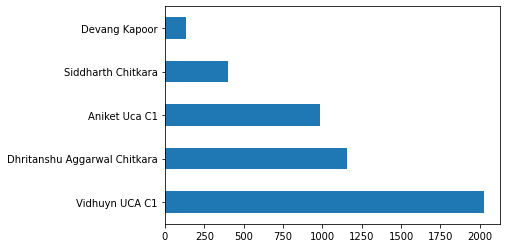

In [ ]:
messages_per_person = df['Name'].value_counts() # Number of messages per person
top_10 = messages_per_person.head(10) # Number of messages per person for the top 10 most active people
top_10.plot.barh(); # Plot a bar chart using pandas built-in plotting apis

In [ ]:
df[df.Name.values == 'Devang Kapoor']

,Date,Time,Name,Message
7,5/19/20,1:20 PM,Devang Kapoor,Yo bros!
9,5/19/20,1:20 PM,Devang Kapoor,That's the spirit
32,5/19/20,1:23 PM,Devang Kapoor,Lekin cheating mein sabh se aage vo
40,5/19/20,1:23 PM,Devang Kapoor,Areh sujeet ko bhi daalo. Vo bhi jugadu banda ...
44,5/19/20,1:24 PM,Devang Kapoor,Soch samjhkar daal lo
...,...,...,...,...
4631,8/15/20,9:03 PM,Devang Kapoor,"Damn bro, thought this was a joke at first Bu..."
4634,8/15/20,9:04 PM,Devang Kapoor,😂😂😂
4635,8/15/20,9:04 PM,Devang Kapoor,Yeah
4636,8/15/20,9:04 PM,Devang Kapoor,Hope it's great


In [ ]:
df_media = df[df.Message.values == '<Media omitted>']
df_media

,Date,Time,Name,Message
10,5/19/20,1:20 PM,Dhritanshu Aggarwal Chitkara,<Media omitted>
115,5/20/20,3:56 PM,Vidhuyn UCA C1,<Media omitted>
189,5/20/20,6:38 PM,Vidhuyn UCA C1,<Media omitted>
201,5/20/20,8:15 PM,Vidhuyn UCA C1,<Media omitted>
226,5/21/20,3:40 PM,Vidhuyn UCA C1,<Media omitted>
...,...,...,...,...
4699,8/19/20,11:54 AM,Vidhuyn UCA C1,<Media omitted>
4702,8/19/20,4:55 PM,Dhritanshu Aggarwal Chitkara,<Media omitted>
4703,8/19/20,4:55 PM,Dhritanshu Aggarwal Chitkara,<Media omitted>
4704,8/19/20,4:55 PM,Dhritanshu Aggarwal Chitkara,<Media omitted>


In [ ]:
# Number of media messages per person
df_media = df_media.groupby('Name')[['Message']].aggregate('count')
df_media

,Message
Name,
Aniket Uca C1,66
Devang Kapoor,9
Dhritanshu Aggarwal Chitkara,262
Siddharth Chitkara,1
Vidhuyn UCA C1,540


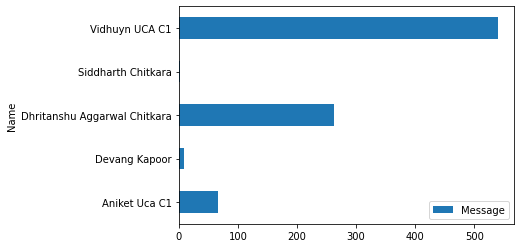

In [ ]:
# Plotting the result
df_media.plot.barh();

In [ ]:
# Now dropping the media messages as they provide nothing now
df_messages = df.drop(df[df.Message.values == '<Media omitted>'].index)
df_messages.head()

,Date,Time,Name,Message
3,5/19/20,1:19 PM,Siddharth Chitkara,whatsup bros
4,5/19/20,1:19 PM,Aniket Uca C1,Hey Bros🤟🏻
5,5/19/20,1:19 PM,Aniket Uca C1,Aaj aag lagani hai 🔥😎
6,5/19/20,1:20 PM,Dhritanshu Aggarwal Chitkara,Hola
7,5/19/20,1:20 PM,Devang Kapoor,Yo bros!


In [ ]:
emoji.demojize("🔥")

':fire:'

In [ ]:
emoji.demojize("Aaj aag lagani hai 🔥😎")

'Aaj aag lagani hai :fire::smiling_face_with_sunglasses:'

In [ ]:
s2 = '' # Combining all the messages into a string
for n in df_messages.Name.unique():
  s1 = df_messages.Message[df_messages.Name == n]
  s2 += (' ').join(s1.values)

s2[:50]  

'whatsup bros kuch aata hoga toh lagegi aag 😂 ye bt'

In [ ]:
emj_count = emoji.emoji_count(s2) # Total emojis used
emj_count

3208

In [ ]:
emj = emoji.emoji_lis(s2)
emj[:10]

[{'emoji': '😂', 'location': 43},
 {'emoji': '😂', 'location': 168},
 {'emoji': '👍', 'location': 221},
 {'emoji': '😂', 'location': 227},
 {'emoji': '😂', 'location': 291},
 {'emoji': '😂', 'location': 292},
 {'emoji': '😂', 'location': 347},
 {'emoji': '😂', 'location': 348},
 {'emoji': '😂', 'location': 358},
 {'emoji': '😂', 'location': 360}]

In [ ]:
emj_lst = [list(emj[i].values())[1] for i in range(len(emj))] # List of all the emoji
emj_lst[:10]

['😂', '😂', '👍', '😂', '😂', '😂', '😂', '😂', '😂', '😂']

In [ ]:
emj_lst[0] == emj_lst[1]

True

In [ ]:
emj_lst_str = ('').join(emj_lst)
emj_lst_str

distinct_emjs = []
for i in emj_lst:
  if i not in distinct_emjs:
    distinct_emjs.append(i)
distinct_emjs[:10]


['😂', '👍', '🔥', '🤛', '🤣', '😄', '\U0001f973', '😎', '🤝', '\U0001f929']

In [ ]:
len(distinct_emjs) # There are 110 unique emojis used

110

In [ ]:
emoji.demojize(distinct_emjs[6], use_aliases=True) # '\U0001f973'

':partying_face:'

In [ ]:
# As there are some emojis in unicode i am converting all to str(demojize the)
dis_demj_lst = [emoji.demojize(i, use_aliases=True) for i in distinct_emjs]
dis_demj_lst[:10]
demj_str = ("").join(dis_demj_lst)
demj_str

':joy::thumbsup::fire::left-facing_fist::rolling_on_the_floor_laughing::smile::partying_face::sunglasses::handshake::star-struck::man_shrugging_selector::tired_face::scream::cold_sweat::ok_hand::smiley::victory_hand_selector::tada::love-you_gesture_light_skin_tone::face_with_hand_over_mouth::man_shrugging_light_skin_tone::right-facing_fist::expressionless::relieved::smiling_imp::smirk::man_gesturing_NO_light_skin_tone::satisfied::dizzy_face::man_tipping_hand_light_skin_tone::grin::triumph::face_with_rolling_eyes::sweat_smile::man_facepalming_light_skin_tone::shushing_face::pleading_face::astonished::face_with_monocle::thumbs_down_light_skin_tone::disappointed::face_with_raised_eyebrow::flushed::fearful::woozy_face::grimacing::face_with_symbols_on_mouth::smiling_face_selector::victory_hand_light_skin_tone::stuck_out_tongue_closed_eyes::confused::clapping_hands_light_skin_tone::cry::unamused::heart_suit_selector::innocent::heart_eyes::see_no_evil::middle_finger_light_skin_tone::right-fac

In [ ]:
df_messages['Emoji_in_the_msg'] = df_messages['Message'].apply(lambda e : [list(emoji.emoji_lis(e)[i].values())[1] for i in range(len(emoji.emoji_lis(e)))])
df_messages['Emoji_Count'] = df_messages['Emoji_in_the_msg'].apply(lambda e : len(e))
df_messages.head()

,Date,Time,Name,Message,Emoji_in_the_msg,Emoji_Count
3,5/19/20,1:19 PM,Siddharth Chitkara,whatsup bros,[],0
4,5/19/20,1:19 PM,Aniket Uca C1,Hey Bros🤟🏻,[🤟🏻],1
5,5/19/20,1:19 PM,Aniket Uca C1,Aaj aag lagani hai 🔥😎,"[🔥, 😎]",2
6,5/19/20,1:20 PM,Dhritanshu Aggarwal Chitkara,Hola,[],0
7,5/19/20,1:20 PM,Devang Kapoor,Yo bros!,[],0


In [ ]:
df_messages.describe()

,Emoji_Count
count,3824.000000
mean,0.838912
std,3.419519
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,200.000000


In [ ]:
# Max Emoji used in a message
df_messages[df_messages['Emoji_Count'] == df_messages['Emoji_Count'].max()]

,Date,Time,Name,Message,Emoji_in_the_msg,Emoji_Count
2794,6/28/20,11:48 AM,Vidhuyn UCA C1,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...,"[🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, ...",200


In [ ]:
emoji_freq_dict = {}

emoji_freq = [emj_lst.count(i) for i in distinct_emjs]

emoji_freq_dict = {distinct_emjs[i] : emoji_freq[i] for i in range(len(distinct_emjs))}

dict(list(emoji_freq_dict.items())[:5])

{'👍': 32, '🔥': 75, '😂': 1560, '🤛': 1, '🤣': 907}

In [ ]:
# Which emoji is the most used?
max(emoji_freq_dict, key = emoji_freq_dict.get)

'😂'

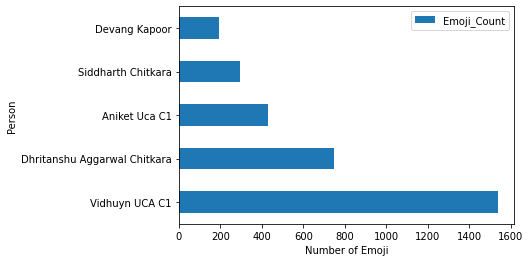

In [ ]:
total_emoji_count_grouped_by_name = df_messages[['Name', 'Emoji_Count']].groupby('Name').sum()
sorted_total_emoji_count_grouped_by_name = total_emoji_count_grouped_by_name.sort_values('Emoji_Count', ascending=False)
top_10_sorted_total_emoji_count_grouped_by_name = sorted_total_emoji_count_grouped_by_name.head(10)
top_10_sorted_total_emoji_count_grouped_by_name.plot.barh()
plt.xlabel('Number of Emoji')
plt.ylabel('Person');


In [ ]:
list(emoji_freq_dict.keys())[:10]

['😂', '👍', '🔥', '🤛', '🤣', '😄', '\U0001f973', '😎', '🤝', '\U0001f929']

In [ ]:
# import sys
# import warnings

# if not sys.warnoptions:
#     warnings.simplefilter("ignore")
# plt.bar(list(emoji_freq_dict.keys())[:10], list(emoji_freq_dict.values())[:10])
# plt.show()

Text(0, 0.5, 'Date')

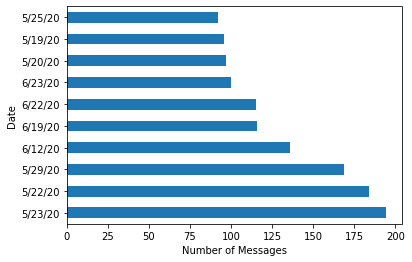

In [ ]:
df_messages['Date'].value_counts().head(10).plot.barh() # Top 10 Dates on which the most number of messages were sent
plt.xlabel('Number of Messages')
plt.ylabel('Date')

In [ ]:
df_messages['Letter_Count'] = df_messages['Message'].apply(lambda s : len(s))
df_messages['Word_Count'] = df_messages['Message'].apply(lambda s : len(s.split(' ')))
df_messages.head()

In [ ]:
df_messages.describe()

,Letter_Count,Word_Count
count,3824.000000,3824.000000
mean,25.273797,5.015690
std,32.182233,5.910198
min,1.000000,1.000000
25%,4.000000,1.000000
50%,15.000000,3.000000
75%,35.000000,7.000000
max,590.000000,115.000000


In [ ]:
df_messages['Letter_Count'].sum()

96647

In [ ]:
df_messages['Word_Count'].sum()

19180

In [ ]:
df_messages['Hour'] = df_messages['Time'].apply(lambda x : x.split(':')[0])
df_messages

,Date,Time,Name,Message,Emoji_in_the_msg,Emoji_Count,Hour
3,5/19/20,1:19 PM,Siddharth Chitkara,whatsup bros,[],0,1
4,5/19/20,1:19 PM,Aniket Uca C1,Hey Bros🤟🏻,[🤟🏻],1,1
5,5/19/20,1:19 PM,Aniket Uca C1,Aaj aag lagani hai 🔥😎,"[🔥, 😎]",2,1
6,5/19/20,1:20 PM,Dhritanshu Aggarwal Chitkara,Hola,[],0,1
7,5/19/20,1:20 PM,Devang Kapoor,Yo bros!,[],0,1
...,...,...,...,...,...,...,...
4698,8/19/20,8:36 AM,Aniket Uca C1,😂🤭,"[😂, 🤭]",2,8
4700,8/19/20,12:00 PM,Aniket Uca C1,Iska ho gaya hai ab. Bekaar hai yeh.,[],0,12
4701,8/19/20,12:03 PM,Vidhuyn UCA C1,😂😂,"[😂, 😂]",2,12
4706,8/19/20,4:58 PM,Aniket Uca C1,🔥🔥,"[🔥, 🔥]",2,4


Text(0, 0.5, 'Hour of Day')

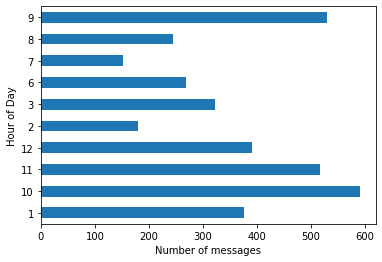

In [ ]:
df_messages['Hour'].value_counts().head(10).sort_index(ascending=True).plot.barh() 
plt.xlabel('Number of messages')
plt.ylabel('Hour of Day')


## Autosuggest/Predictive text using Markov Chains

In [ ]:
def generateTable(data, k = 4):
  T = {}

  for i in range(len(data)-k):
    X = data[i:i+k]
    y = data[i+k]

    if T.get(X) is None:
      T[X] = {}
      T[X][y] = 1
    else:
      if T[X].get(y) is None:
        T[X][y] = 1
      else:
        T[X][y] += 1

  return T

T = generateTable(s2)
T

{'what': {' ': 20, ',': 1, '?': 1, 's': 4},
 'hats': {' ': 1, 'A': 4, 'a': 3, 'u': 1},
 'atsu': {'p': 1},
 'tsup': {' ': 1},
 'sup ': {'b': 1},
 'up b': {'a': 2, 'e': 1, 'h': 1, 'n': 1, 'r': 1},
 'p br': {'o': 1},
 ' bro': {' ': 20, '!': 2, ',': 2, '.': 2, 'k': 1, 's': 6, 't': 5, 'w': 5},
 'bros': {' ': 5, '!': 1},
 'ros ': {'c': 1, 'd': 1, 'k': 1, '👍': 1, '🙌': 1},
 'os k': {'u': 1, 'y': 1},
 's ku': {'c': 2},
 ' kuc': {'h': 47},
 'kuch': {' ': 36, '?': 2, 'h': 9},
 'uch ': {'N': 1,
  'P': 1,
  'a': 9,
  'b': 10,
  'd': 1,
  'f': 1,
  'h': 4,
  'k': 3,
  'l': 3,
  'n': 15,
  'p': 3,
  'r': 1,
  's': 5,
  'u': 1},
 'ch a': {' ': 3, 'a': 2, 'i': 3, 's': 1, 'u': 1},
 'h aa': {'j': 1, 'r': 2, 't': 2, 'y': 1},
 ' aat': {'a': 10, 'e': 7, 'i': 7, 'l': 1, 'm': 1},
 'aata': {' ': 9, ',': 1, '.': 1},
 'ata ': {'B': 1,
  'M': 3,
  'P': 1,
  'S': 1,
  'V': 1,
  'Y': 1,
  'a': 1,
  'b': 3,
  'c': 7,
  'd': 9,
  'h': 16,
  'i': 1,
  'k': 6,
  'l': 4,
  'm': 1,
  'n': 16,
  'p': 1,
  'r': 4,
  's': 1

In [ ]:
list(T.keys())

['what',
 'hats',
 'atsu',
 'tsup',
 'sup ',
 'up b',
 'p br',
 ' bro',
 'bros',
 'ros ',
 'os k',
 's ku',
 ' kuc',
 'kuch',
 'uch ',
 'ch a',
 'h aa',
 ' aat',
 'aata',
 'ata ',
 'ta h',
 'a ho',
 ' hog',
 'hoga',
 'oga ',
 'ga t',
 'a to',
 ' toh',
 'toh ',
 'oh l',
 'h la',
 ' lag',
 'lage',
 'ageg',
 'gegi',
 'egi ',
 'gi a',
 'i aa',
 ' aag',
 'aag ',
 'ag 😂',
 'g 😂 ',
 ' 😂 y',
 '😂 ye',
 ' ye ',
 'ye b',
 'e bt',
 ' bta',
 'btao',
 'tao ',
 'ao k',
 'o ka',
 ' kau',
 'kaun',
 'aun ',
 'un b',
 'n bt',
 'btae',
 'taeg',
 'aega',
 'ega ',
 'ga a',
 'a an',
 ' ans',
 'answ',
 'nswe',
 'swer',
 'wers',
 'ers ',
 'rs k',
 's kr',
 ' krd',
 'krde',
 'rde ',
 'de j',
 'e jo',
 ' jo ',
 'jo b',
 'o bh',
 ' bhi',
 'bhi ',
 'hi t',
 'i th',
 ' the',
 'thee',
 'heek',
 'eek ',
 'ek l',
 'k lg',
 ' lge',
 'lge ',
 'ge s',
 'e sa',
 ' sam',
 'samr',
 'amri',
 'mrid',
 'ridh',
 'idhi',
 'dhi ',
 'hi k',
 'i ko',
 ' ko ',
 'ko a',
 'o ad',
 ' add',
 'add ',
 'dd k',
 'd kr',
 ' krn',
 'krne',
 

In [ ]:
list(T.values())

[{' ': 20, ',': 1, '?': 1, 's': 4},
 {' ': 1, 'A': 4, 'a': 3, 'u': 1},
 {'p': 1},
 {' ': 1},
 {'b': 1},
 {'a': 2, 'e': 1, 'h': 1, 'n': 1, 'r': 1},
 {'o': 1},
 {' ': 20, '!': 2, ',': 2, '.': 2, 'k': 1, 's': 6, 't': 5, 'w': 5},
 {' ': 5, '!': 1},
 {'c': 1, 'd': 1, 'k': 1, '👍': 1, '🙌': 1},
 {'u': 1, 'y': 1},
 {'c': 2},
 {'h': 47},
 {' ': 36, '?': 2, 'h': 9},
 {'N': 1,
  'P': 1,
  'a': 9,
  'b': 10,
  'd': 1,
  'f': 1,
  'h': 4,
  'k': 3,
  'l': 3,
  'n': 15,
  'p': 3,
  'r': 1,
  's': 5,
  'u': 1},
 {' ': 3, 'a': 2, 'i': 3, 's': 1, 'u': 1},
 {'j': 1, 'r': 2, 't': 2, 'y': 1},
 {'a': 10, 'e': 7, 'i': 7, 'l': 1, 'm': 1},
 {' ': 9, ',': 1, '.': 1},
 {'B': 1,
  'M': 3,
  'P': 1,
  'S': 1,
  'V': 1,
  'Y': 1,
  'a': 1,
  'b': 3,
  'c': 7,
  'd': 9,
  'h': 16,
  'i': 1,
  'k': 6,
  'l': 4,
  'm': 1,
  'n': 16,
  'p': 1,
  'r': 4,
  's': 1,
  't': 8,
  'v': 1,
  'y': 2,
  '♥': 1,
  '😅': 1,
  '🤦': 1},
 {'a': 41, 'i': 2, 'o': 2, 'u': 7},
 {' ': 8, '.': 1, 'g': 11, 'n': 4, 't': 13, 'w': 1},
 {'a': 2

In [ ]:
k = 4
initial_value = 'hello'
for i in range(100):
  inval = initial_value[-k:]

  possible_chars = list(T[inval].keys())
  possible_values = list(T[inval].values())

  sum_ = np.sum(possible_values)

  probabs = np.array(possible_values / sum_)

  y = np.random.choice(possible_chars, p = probabs)

  initial_value += y
initial_value

'hellower questing mein Meri side se bhi dene ki jab tak ki view kar Instagramming n wait Krdiya jaate se '